In [5]:
import numpy as np
import torch
import torch.nn as nn
from ssm import SSM

L = 5
d_state = 16
A_scales_list = np.linspace(0, 1, 20).tolist()
n = 3
seeds = range(30)

cns = []
A_scales = []

for A_scale in A_scales_list:
    for i in seeds:
        torch.manual_seed(i)
        sd = SSM(num_input_channels=3, d_model=n, d_state=d_state, mup=True, use_kernel=True, A_scale=A_scale)
        sd.B = nn.Parameter(torch.ones(d_state))
        sd.C = nn.Parameter(torch.ones(d_state))

        cn = torch.linalg.cond(sd.kernel(L))
        cns.append(cn.item())
        A_scales.append(A_scale)
    # print(f"A_scale is {A_scale}; condition number is {cn}")


<Axes: xlabel='A_scale', ylabel='cond_num'>

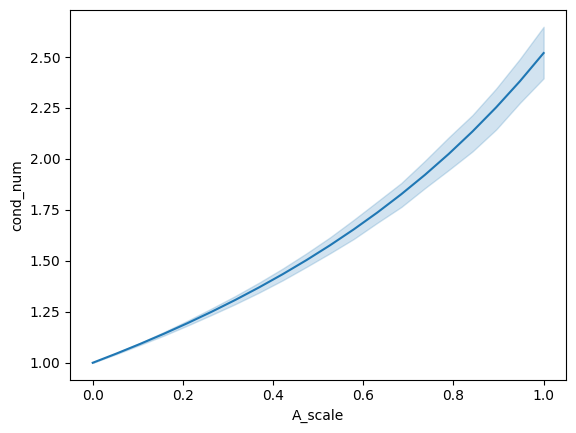

In [6]:
import pandas as pd
import seaborn as sns

df = pd.DataFrame({'A_scale': A_scales, 'cond_num': cns})
sns.lineplot(data=df, x='A_scale', y='cond_num')